In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
data = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

translated_columns = { 
    'preco' : 'price',
    'vendido': 'sold',
    'idade_do_modelo': 'model_age',
    'km_por_ano': 'km_per_year'
}

data.rename(columns = translated_columns, inplace = True)

data.head()

,price,sold,model_age,km_per_year
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = data[["price", "model_age","km_per_year"]]
y = data["sold"]

SEED = 158020
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Training with %d elements and testing with %d elements" % (len(train_x), len(test_x)))


Training with 7500 elements and testing with 2500 elements


In [3]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
accuracy = dummy_stratified.score(test_x, test_y) * 100

print("The accuracy of the dummy stratified was %.2f%%" % accuracy)

The accuracy of the dummy stratified was 50.96%
C:\Users\PedroFerreira\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


In [4]:
from sklearn.tree import DecisionTreeClassifier

SEED = 158020
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=2)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("The accuracy was %.2f%%" % accuracy)


The accuracy was 71.92%


In [5]:
x = data[["price", "model_age","km_per_year"]]
y = data["sold"]

SEED = 158020
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Training with %d elements and testing with %d elements" % (len(train_x), len(test_x)))

model = DecisionTreeClassifier(max_depth=2)
model.fit(train_x, train_y)
predictions = model.predict(test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print("A acurácia foi %.2f%%" % accuracy)


Training with 7500 elements and testing with 2500 elements
A acurácia foi 71.92%


# Cross validate (K Fold)

The cross validate breaks our data in **cv** times to perform the training and testing. In this way, the model's randomness factor is reduced, taking into account that the model will be trained and tested with **cv** combinations of data.

The cross validate is deterministic (take the data and separate it into ** cv ** pieces)

<img src='images/cross-validation-example.png' style="width: 500px" />



In [6]:
from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = 3, return_train_score=False)

average = results['test_score'].mean()
std_deviation = results['test_score'].std()

# Gets the mean excluding the two extreme tails with their std 
interval = ((average - 2 * std_deviation) * 100, (average + 2 * std_deviation) * 100)


print('Accuracy with cross validation 3: [%.2f, %.2f]' % interval)


Accuracy with cross validation 3: [74.99, 76.57]


In [7]:
SEED = 158020
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = 10, return_train_score=False)

average = results['test_score'].mean()
std_deviation = results['test_score'].std()

# Gets the mean excluding the two extreme tails with their std 
interval = ((average - 2 * std_deviation) * 100, (average + 2 * std_deviation) * 100)


print('Accuracy with cross validation 10: [%.2f, %.2f]' % interval)

Accuracy with cross validation 10: [74.24, 77.32]


In [8]:
SEED = 158020
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = 5, return_train_score=False)

average = results['test_score'].mean()
std_deviation = results['test_score'].std()

# Gets the mean excluding the two extreme tails with their std 
interval = ((average - 2 * std_deviation) * 100, (average + 2 * std_deviation) * 100)


print('Accuracy with cross validation 5: [%.2f, %.2f]' % interval)

Accuracy with cross validation 5: [75.21, 76.35]


# Random cross validate

In [9]:
def print_results(results):
    average = results['test_score'].mean()
    std_deviation = results['test_score'].std()

    # Gets the mean excluding the two extreme tails with their std 
    interval = ((average - 2 * std_deviation) * 100, (average + 2 * std_deviation) * 100)
    print('Average accuracy %.2f' % (average * 100))
    print('Accuracy interval: [%.2f, %.2f]' % interval)

In [10]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

# Breaks the data in n parts, deterministic way
cv = KFold(n_splits=10)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = cv, return_train_score=False)

print_results(results)

Average accuracy 75.78
Accuracy interval: [74.37, 77.19]


In practice, if the data does not have any internal structure, such as a sequence by dates, for example, first generate a random sequence of these data and then break it into 10 pieces or do both at the same time. This is the traditional way of running with shuffle and n_splits.

In [11]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

# Breaks the data in n parts, in a shuffled way
cv = KFold(n_splits=10, shuffle=True)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, x, y, cv = cv, return_train_score=False)

print_results(results)

Average accuracy 75.76
Accuracy interval: [73.26, 78.26]


# Simulate horrible bad luck situation

It may be an "unlucky" situation or an unbalanced proportion of examples between classes.

In [12]:
bad_luck_data = data.sort_values("sold", ascending = True)

bad_luck_x = bad_luck_data[["price", "model_age","km_per_year"]]
bad_luck_y = bad_luck_data["sold"]

bad_luck_data.head()

,price,sold,model_age,km_per_year
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [13]:
# Without shuffle
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, return_train_score=False)

print_results(results)

Average accuracy 57.84
Accuracy interval: [34.29, 81.39]


In [14]:
# With shuffle
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits=10, shuffle = True)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, return_train_score=False)

print_results(results)

Average accuracy 75.78
Accuracy interval: [72.30, 79.26]


In [15]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits=10, shuffle = True)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, return_train_score=False)

print_results(results)

Average accuracy 75.78
Accuracy interval: [73.55, 78.01]


## Generating random data of car model for grouping simulation when using our estimator

In [16]:
np.random.seed(SEED)

# Creating a fictional "car model" column based on random numbers (based on model age)

data['random_model'] = data['model_age'] + np.random.randint(-2, 3, size = 10000)
data['random_model'] = data['random_model'] + abs(data['random_model'].min()) + 1
data.head()

,price,sold,model_age,km_per_year,random_model
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


## Testing cross validation with GroupKFold

In [17]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)

model = DecisionTreeClassifier(max_depth=2)
results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, groups= data['random_model'], return_train_score=False)

print_results(results)

Average accuracy 75.78
Accuracy interval: [73.67, 77.90]


## Cross validation with StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(train_x)
scaled_train_x = scaler.transform(train_x)
scaled_test_x = scaler.transform(test_x)

model = SVC()
model.fit(scaled_train_x, train_y)
predictions = model.predict(scaled_test_x)

accuracy = accuracy_score(test_y, predictions) * 100
print('The accuracy was %.2f%%' % accuracy)

The accuracy was 74.40%


In [19]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)
cv = GroupKFold(n_splits=10)

model = SVC()
results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, groups = data['random_model'], return_train_score=False)

print_results(results)

Average accuracy 77.27
Accuracy interval: [74.35, 80.20]


In [20]:
scaler = StandardScaler()
scaler.fit(bad_luck_x)
scaled_bad_luck_x = scaler.transform(bad_luck_x)


In [21]:
from sklearn.pipeline import Pipeline


#In the previous examples, we were scaling the whole dataset. Considering that we are making a cross validation, we should scale the train test per KFold. To achieve that, we can use sklearn Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
model = SVC()

pipeline = Pipeline([
    ('transformation', scaler),
    ('estimator', model),
])
pipeline

cv = GroupKFold(n_splits=10)


results = cross_validate(pipeline, bad_luck_x, bad_luck_y, cv = cv, groups = data['random_model'], return_train_score=False)

print_results(results)

Average accuracy 76.68
Accuracy interval: [74.28, 79.08]


In [22]:
SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits=10)

model = DecisionTreeClassifier(max_depth=3)
results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, groups= data['random_model'], return_train_score=False)

print_results(results)

Average accuracy 78.67
Accuracy interval: [76.40, 80.94]


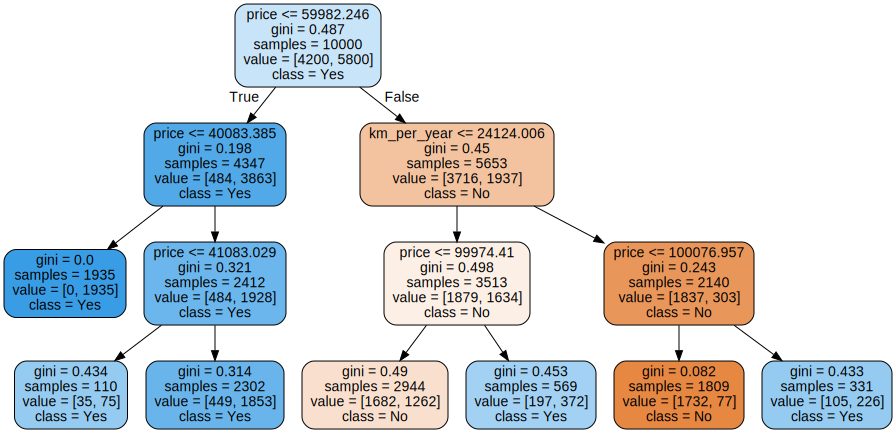

In [23]:
from sklearn.tree import export_graphviz
import graphviz

model.fit(bad_luck_x, bad_luck_y)
features = bad_luck_x.columns
dot_data = export_graphviz(model, out_file=None, filled = True, rounded=True, class_names=['No', 'Yes'], feature_names= features)

graph = graphviz.Source(dot_data)
graph


## Hyper-parameters

Hyper parameters are parameters that have direct influence on the output of a given classifier. Those parameters are passed before the model gets its fit, on the instantiation of the model, e.g.
`DecisionTree(max_depth=3)`, where `max_depth` is a hyper-parameter

### Testing parameters

In [24]:
def executes_decision_tree(max_depth):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)

    model = DecisionTreeClassifier(max_depth=max_depth)
    results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, groups= data['random_model'], return_train_score=True)

    # print(results['train_score'])

    test_score = results['test_score'].mean() * 100
    train_score = results['train_score'].mean() * 100

    print('max_depth = %d, test = %.2f, train = %.2f' % (max_depth, test_score, train_score))
    table = [max_depth, test_score, train_score]
    return table

results = [executes_decision_tree(i) for i in range(1, 33)]
results = pd.DataFrame(results, columns=['max_depth', 'test', 'train'])    
print(results)

max_depth = 1, test = 75.78, train = 75.79
max_depth = 2, test = 75.78, train = 75.79
max_depth = 3, test = 78.67, train = 78.75
max_depth = 4, test = 78.63, train = 78.79
max_depth = 5, test = 78.56, train = 78.94
max_depth = 6, test = 78.12, train = 79.17
max_depth = 7, test = 77.96, train = 79.50
max_depth = 8, test = 77.86, train = 79.89
max_depth = 9, test = 77.38, train = 80.46
max_depth = 10, test = 77.19, train = 81.16
max_depth = 11, test = 76.97, train = 82.03
max_depth = 12, test = 76.49, train = 82.89
max_depth = 13, test = 75.81, train = 83.95
max_depth = 14, test = 75.66, train = 85.03
max_depth = 15, test = 75.16, train = 86.14
max_depth = 16, test = 75.11, train = 87.19
max_depth = 17, test = 74.74, train = 88.31
max_depth = 18, test = 74.33, train = 89.26
max_depth = 19, test = 74.34, train = 90.32
max_depth = 20, test = 74.22, train = 91.32
max_depth = 21, test = 73.80, train = 92.14
max_depth = 22, test = 73.81, train = 93.02
max_depth = 23, test = 73.38, train = 93.

## OVERFIT, great for the train, not so good for the tests

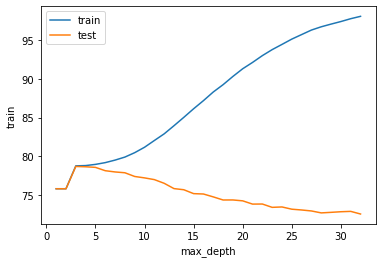

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x = 'max_depth', y = 'train', data = results)
sns.lineplot(x = 'max_depth', y = 'test', data = results)
plt.legend(['train', 'test'])

In [26]:
best_results = results.sort_values('test', ascending=False).head()
print(best_results)

   max_depth       test      train
2          3  78.672633  78.750993
3          4  78.632803  78.787628
4          5  78.555912  78.941007
5          6  78.123266  79.170115
6          7  77.963185  79.496806


# Exploring hyper-parameters in 2 dimensions


In [27]:
def executes_decision_tree(max_depth, min_samples_leaf):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, groups= data['random_model'], return_train_score=True)

    # print(results['train_score'])

    test_score = results['test_score'].mean() * 100
    train_score = results['train_score'].mean() * 100

    print('max_depth = %d, min_samples_leaf = %.2d, test = %.2f, train = %.2f' % (max_depth, min_samples_leaf, test_score, train_score))
    table = [max_depth, min_samples_leaf, test_score, train_score]
    return table

def search():
    results = []

    for max_depth in range(1,33):
        # random sampling so we don't need to test every possibility (1:33) * 4
        for min_samples_leaf in [32, 64, 128, 256]: 
            table = executes_decision_tree(max_depth, min_samples_leaf)
            results.append(table)

    results = pd.DataFrame(results, columns=['max_depth', 'min_samples_leaf','test', 'train'])
    return results


results = search()
print(results)

max_depth = 1, min_samples_leaf = 32, test = 75.78, train = 75.79
max_depth = 1, min_samples_leaf = 64, test = 75.78, train = 75.79
max_depth = 1, min_samples_leaf = 128, test = 75.78, train = 75.79
max_depth = 1, min_samples_leaf = 256, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 32, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 64, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 128, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 256, test = 75.78, train = 75.79
max_depth = 3, min_samples_leaf = 32, test = 78.67, train = 78.75
max_depth = 3, min_samples_leaf = 64, test = 78.67, train = 78.75
max_depth = 3, min_samples_leaf = 128, test = 78.67, train = 78.75
max_depth = 3, min_samples_leaf = 256, test = 78.67, train = 78.75
max_depth = 4, min_samples_leaf = 32, test = 78.67, train = 78.75
max_depth = 4, min_samples_leaf = 64, test = 78.67, train = 78.75
max_depth = 4, min_samples_leaf = 128, test = 78.67, train = 78.75
max

In [28]:
best_results = results.sort_values('test', ascending=False).head()
print(best_results)

    max_depth  min_samples_leaf       test      train
15          4               256  78.672633  78.750993
12          4                32  78.672633  78.750993
14          4               128  78.672633  78.750993
13          4                64  78.672633  78.750993
8           3                32  78.672633  78.750993


In [29]:
corr = results.corr()

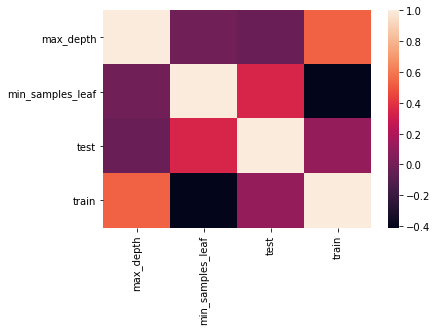

In [30]:
sns.heatmap(corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002967BF84760>,
      dtype=object)

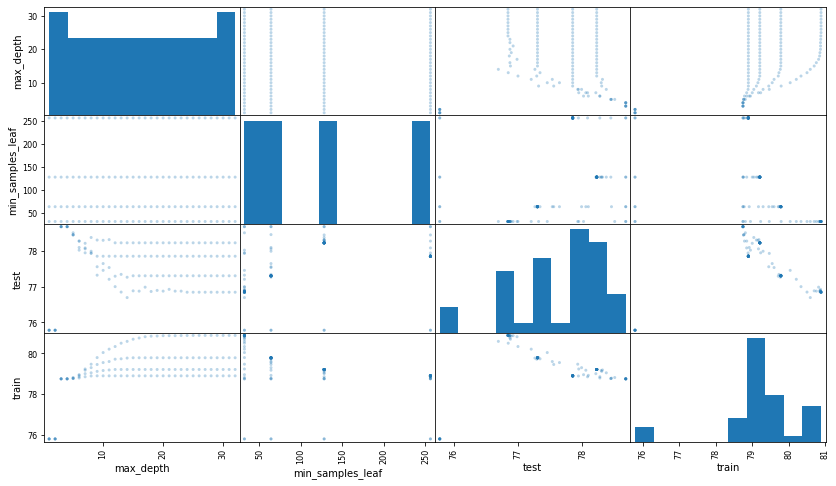

In [31]:
from pandas.plotting import scatter_matrix

scatter_matrix(results, figsize=(14,8), alpha=0.3)

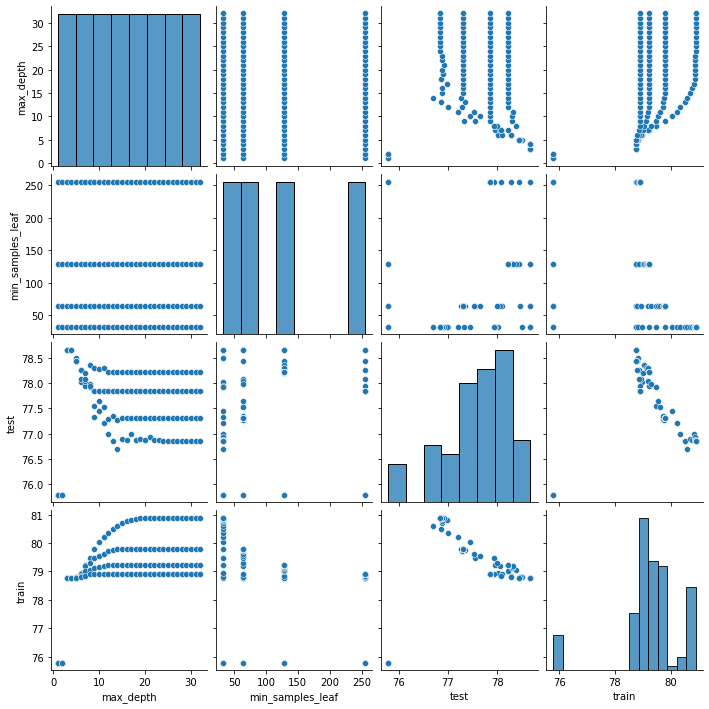

In [32]:
sns.pairplot(results)

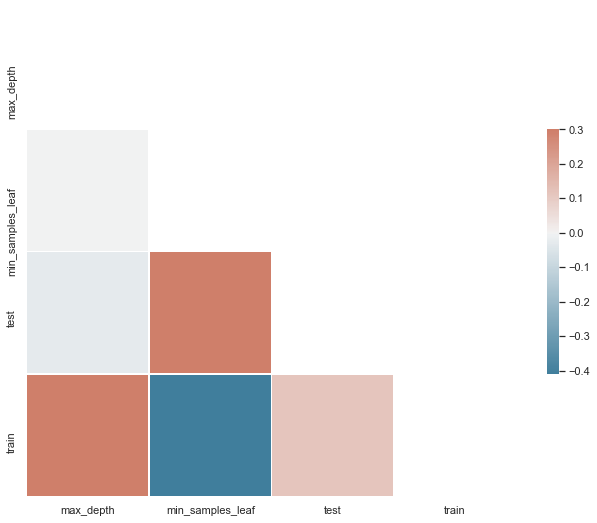

In [33]:
from string import ascii_letters
import numpy as np

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [34]:
def search():
    results = []

    for max_depth in range(1,33):
        # random sampling so we don't need to test every possibility (1:33) * 4
        for min_samples_leaf in [128, 192, 256, 512]: 
            table = executes_decision_tree(max_depth, min_samples_leaf)
            results.append(table)

    results = pd.DataFrame(results, columns=['max_depth', 'min_samples_leaf','test', 'train'])
    return results

results = search()    
results.head()

max_depth = 1, min_samples_leaf = 128, test = 75.78, train = 75.79
max_depth = 1, min_samples_leaf = 192, test = 75.78, train = 75.79
max_depth = 1, min_samples_leaf = 256, test = 75.78, train = 75.79
max_depth = 1, min_samples_leaf = 512, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 128, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 192, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 256, test = 75.78, train = 75.79
max_depth = 2, min_samples_leaf = 512, test = 75.78, train = 75.79
max_depth = 3, min_samples_leaf = 128, test = 78.67, train = 78.75
max_depth = 3, min_samples_leaf = 192, test = 78.67, train = 78.75
max_depth = 3, min_samples_leaf = 256, test = 78.67, train = 78.75
max_depth = 3, min_samples_leaf = 512, test = 77.50, train = 77.53
max_depth = 4, min_samples_leaf = 128, test = 78.67, train = 78.75
max_depth = 4, min_samples_leaf = 192, test = 78.67, train = 78.75
max_depth = 4, min_samples_leaf = 256, test = 78.67, train = 7

,max_depth,min_samples_leaf,test,train
0,1,128,75.784219,75.791169
1,1,192,75.784219,75.791169
2,1,256,75.784219,75.791169
3,1,512,75.784219,75.791169
4,2,128,75.784219,75.791169


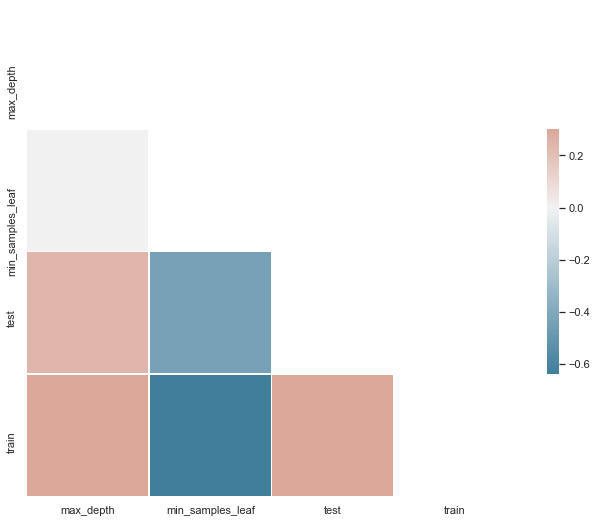

In [35]:
corr = results.corr()

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [36]:
best_results = results.sort_values('test', ascending=False).head()
print(best_results)

    max_depth  min_samples_leaf       test      train
13          4               192  78.672633  78.750993
8           3               128  78.672633  78.750993
9           3               192  78.672633  78.750993
10          3               256  78.672633  78.750993
14          4               256  78.672633  78.750993


## Exploring 3 dimensions of hyper-parameters

In [37]:
def executes_decision_tree(max_depth, min_samples_leaf, min_samples_split):
    SEED = 301
    np.random.seed(SEED)

    cv = GroupKFold(n_splits=10)

    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split=min_samples_split)
    results = cross_validate(model, bad_luck_x, bad_luck_y, cv = cv, groups= data['random_model'], return_train_score=True)

    # print(results['train_score'])
    fit_time = results['fit_time'].mean()
    score_time= results['score_time'].mean()
    test_score = results['test_score'].mean() * 100
    train_score = results['train_score'].mean() * 100

    # print('max_depth = %d, min_samples_leaf = %.2d, min_samples_split = %.2d, test = %.2f, train = %.2f' % (max_depth, min_samples_leaf, min_samples_split, test_score, train_score))

    table = [max_depth, min_samples_leaf, min_samples_split, test_score, train_score, fit_time, score_time]
    return table

def search():
    results = []

    for max_depth in range(1,33):
        # random sampling so we don't need to test every possibility (1:33) * 4
        for min_samples_leaf in [32,64,128,256]: 
            for min_samples_split in [32,64,128,256]:
                table = executes_decision_tree(max_depth, min_samples_leaf, min_samples_split)
                results.append(table)

    results = pd.DataFrame(results, columns=['max_depth', 'min_samples_leaf','min_samples_split', 'test', 'train', 'fit_time', 'score_time'])
    return results

results = search()    
results.head()

,max_depth,min_samples_leaf,min_samples_split,test,train,fit_time,score_time
0,1,32,32,75.784219,75.791169,0.008499,0.003302
1,1,32,64,75.784219,75.791169,0.006304,0.002302
2,1,32,128,75.784219,75.791169,0.005798,0.002263
3,1,32,256,75.784219,75.791169,0.005890,0.002302
4,1,64,32,75.784219,75.791169,0.005599,0.002011


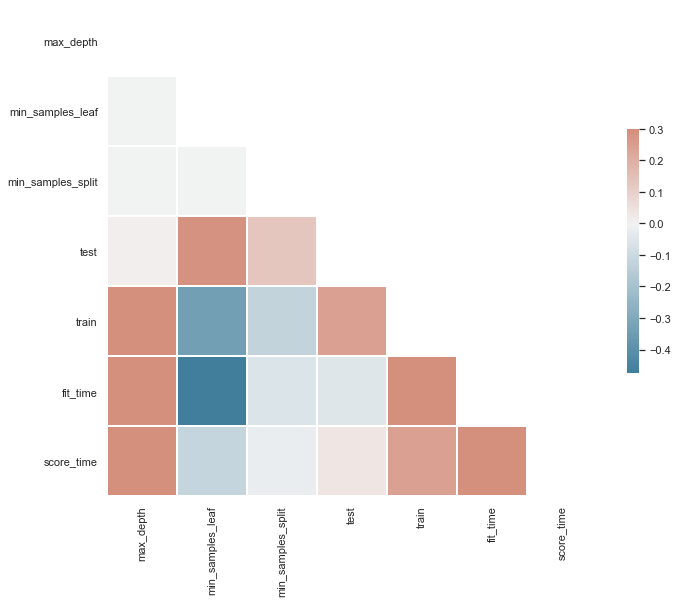

In [38]:
corr = results.corr()

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
best_results = results.sort_values('test', ascending=False).head()
print(best_results)

    max_depth  min_samples_leaf  min_samples_split       test      train  \
63          4               256                256  78.672633  78.750993   
48          4                32                 32  78.672633  78.750993   
34          3                32                128  78.672633  78.750993   
35          3                32                256  78.672633  78.750993   
36          3                64                 32  78.672633  78.750993   

    fit_time  score_time  
63  0.010495    0.002499  
48  0.013838    0.002968  
34  0.009396    0.002356  
35  0.009391    0.002295  
36  0.009138    0.002504  


# Exploring hyper-parameters space with GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

parameters_space = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                      parameters_space,
                      cv = KFold(n_splits = 10, shuffle=True))

search.fit(bad_luck_x, bad_luck_y, groups = data['random_model'])                      
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012699,0.001552,0.002900,0.000698,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
1,0.009201,0.000399,0.002000,0.000001,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
2,0.009399,0.000663,0.002100,0.000300,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
3,0.008699,0.000467,0.002200,0.000399,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1
4,0.009006,0.000462,0.002094,0.000301,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.78,0.779,0.787,0.013229,1


In [41]:
print(search.best_params_)
print(search.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.7


In [42]:
best_estimator = search.best_estimator_
print(best_estimator)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)


In [43]:
# Avoid this approach because is being too optimistic (combining cross-validation with GridSearchCV)
# More about this on https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html

predictions = best_estimator.predict(bad_luck_x)
accuracy = accuracy_score(predictions, bad_luck_y) * 100

print('Accuracy for the data is %.2f%%' % accuracy)

Accuracy for the data is 78.75%


## How to have an estimate without this addiction to the data already seen?

In the case of cross validation with hyper parameter search, we do a new cross validation. This is called **Nested cross-validation**

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(search, bad_luck_x, bad_luck_y, cv = KFold(n_splits=5, shuffle=True))
print(scores)

[0.77   0.79   0.7875 0.7845 0.8025]


In [45]:
def print_score(scores):
    average = scores.mean()
    std_deviation = scores.std()

    # Gets the mean excluding the two extreme tails with their std 
    interval = ((average - 2 * std_deviation) * 100, (average + 2 * std_deviation) * 100)
    print('Average accuracy %.2f' % (average * 100))
    print('Accuracy interval: [%.2f, %.2f]' % interval)

In [46]:
print_score(scores)

Average accuracy 78.69
Accuracy interval: [76.60, 80.78]


In [47]:
best_estimator = search.best_estimator_
best_estimator

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

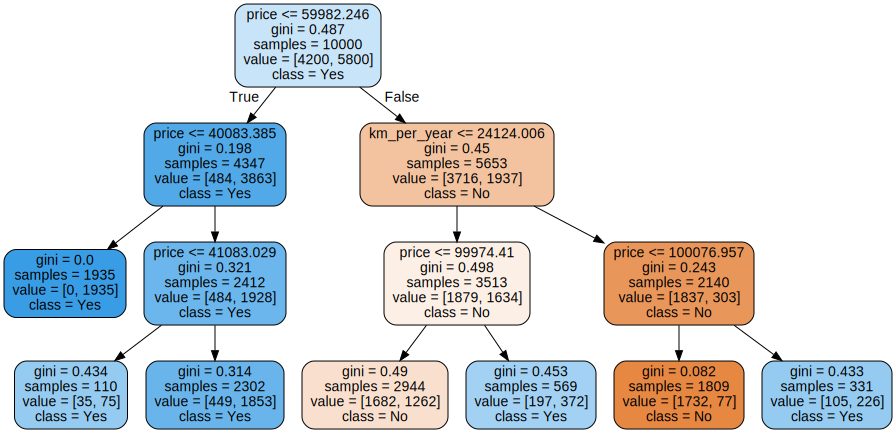

In [48]:
features = bad_luck_x.columns
dot_data = export_graphviz(best_estimator, out_file=None, filled = True, rounded=True, class_names=['No', 'Yes'], feature_names= features)

graph = graphviz.Source(dot_data)
graph

# Random Search

In [50]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 301
np.random.seed(SEED)

parameters_space = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy']
}

search = RandomizedSearchCV(
                      DecisionTreeClassifier(),
                      parameters_space,
                      n_iter = 16,
                      cv = KFold(n_splits = 10, shuffle=True),
                      random_state = SEED)

search.fit(bad_luck_x, bad_luck_y, groups = data['random_model'])                      
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012699,0.001552,0.002500,0.000670,128,128,5,gini,"{'min_samples_split': 128, 'min_samples_leaf':...",0.767,...,0.775,0.807,0.792,0.796,0.79,0.769,0.779,0.7854,0.013032,7
1,0.010100,0.001578,0.002502,0.000502,64,32,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.780,0.779,0.7870,0.013229,1
2,0.009998,0.001094,0.002402,0.000665,64,128,3,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.774,0.813,0.792,0.796,0.79,0.780,0.779,0.7870,0.013229,1
3,0.023699,0.003348,0.003200,0.000873,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.767,...,0.775,0.809,0.792,0.796,0.79,0.769,0.779,0.7852,0.012960,10
4,0.020599,0.002765,0.002602,0.000490,64,64,5,entropy,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.767,...,0.775,0.809,0.792,0.796,0.79,0.769,0.779,0.7852,0.012960,10


In [52]:
scores = cross_val_score(search, bad_luck_x, bad_luck_y, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

Average accuracy 78.59
Accuracy interval: [76.40, 80.78]


In [ ]:
best_estimator = search.best_estimator_
print(best_estimator)

# Customizing the hyper-parameter space

In [53]:
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

parameters_space = {
    'max_depth': [3,5, 10, 15, 20, 30, None],
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'entropy']
}

search = RandomizedSearchCV(
                      DecisionTreeClassifier(),
                      parameters_space,
                      n_iter = 16,
                      cv = KFold(n_splits = 10, shuffle=True),
                      random_state = SEED)

search.fit(bad_luck_x, bad_luck_y)                      
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013953,0.001824,0.002900,0.000830,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.767,...,0.774,0.813,0.792,0.796,0.790,0.780,0.779,0.7870,0.013229,1
1,0.017304,0.001551,0.002286,0.000647,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.762,...,0.769,0.807,0.796,0.792,0.780,0.773,0.768,0.7787,0.014416,10
2,0.017899,0.001695,0.003400,0.000663,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.767,...,0.769,0.805,0.795,0.794,0.785,0.771,0.776,0.7826,0.012643,5
3,0.020500,0.001856,0.003301,0.000901,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754,...,0.771,0.805,0.795,0.785,0.779,0.767,0.755,0.7745,0.015750,16
4,0.017101,0.002586,0.002405,0.000797,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.767,...,0.769,0.799,0.795,0.794,0.785,0.768,0.776,0.7819,0.011836,6


In [55]:
scores = cross_val_score(search, bad_luck_x, bad_luck_y, cv = KFold(n_splits=5, shuffle=True))
print_score(scores)

best_estimator = search.best_estimator_
print(best_estimator)

Average accuracy 78.59
Accuracy interval: [76.40, 80.78]
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=71,
                       min_samples_split=100)


In [66]:
ordered_results_by_average = results.sort_values('mean_test_score', ascending=False) 


for index, line in ordered_results_by_average.iterrows():
    print('%.3f +- (%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.787 +- (0.026) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.785 +- (0.026) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 73, 'min_samples_split': 72}
0.785 +- (0.026) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 67}
0.783 +- (0.025) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 125, 'min_samples_split': 59}
0.783 +- (0.025) {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 124, 'min_samples_split': 88}
0.782 +- (0.024) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 126, 'min_samples_split': 84}
0.781 +- (0.023) {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 74, 'min_samples_split': 58}
0.781 +- (0.026) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 108, 'min_samples_split': 110}
0.780 +- (0.024) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 88, 'min_samples_split': 78}
0.779 +- (0.029) {'criterion': 'gini', 'max

# Depth random exploration 

In [67]:
from scipy.stats import randint

SEED = 301
np.random.seed(SEED)

parameters_space = {
    'max_depth': [3,5, 10, 15, 20, 30, None],
    'min_samples_split': randint(32, 128),
    'min_samples_leaf': randint(32, 128),
    'criterion': ['gini', 'entropy']
}

search = RandomizedSearchCV(
                      DecisionTreeClassifier(),
                      parameters_space,
                      n_iter = 64,
                      cv = KFold(n_splits = 10, shuffle=True),
                      random_state = SEED)

search.fit(bad_luck_x, bad_luck_y)                      
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014514,0.001877,0.002849,0.000700,entropy,3,71,100,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.767,...,0.774,0.813,0.792,0.796,0.790,0.780,0.779,0.7870,0.013229,1
1,0.020755,0.004725,0.003200,0.000748,gini,15,93,111,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.762,...,0.769,0.807,0.796,0.792,0.780,0.773,0.768,0.7787,0.014416,42
2,0.018550,0.005407,0.003064,0.002404,gini,20,124,88,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.767,...,0.769,0.805,0.795,0.794,0.785,0.771,0.776,0.7826,0.012643,19
3,0.021643,0.001903,0.003052,0.000848,gini,None,46,62,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.754,...,0.771,0.805,0.795,0.785,0.779,0.767,0.755,0.7745,0.015750,58
4,0.018598,0.001854,0.002801,0.000750,gini,15,126,84,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.767,...,0.769,0.799,0.795,0.794,0.785,0.768,0.776,0.7819,0.011836,22


In [68]:
ordered_results_by_average = results.sort_values('mean_test_score', ascending=False) 


for index, line in ordered_results_by_average.iterrows():
    print('%.3f +- (%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.787 +- (0.026) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 71, 'min_samples_split': 100}
0.787 +- (0.026) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 69, 'min_samples_split': 124}
0.787 +- (0.026) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 63, 'min_samples_split': 88}
0.787 +- (0.026) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 67, 'min_samples_split': 76}
0.787 +- (0.026) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 65, 'min_samples_split': 50}
0.787 +- (0.026) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 120, 'min_samples_split': 46}
0.787 +- (0.026) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 53, 'min_samples_split': 111}
0.787 +- (0.026) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 106, 'min_samples_split': 108}
0.786 +- (0.027) {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 111, 'min_samples_split': 94}
0.785 +- (0.026) {'criterion': 'gini', 'max_d

# Comparing GridSearchCV with RandomizedSearchCV

In [71]:
from sklearn.ensemble import RandomForestClassifier
import time

SEED = 301
np.random.seed(SEED)

parameters_space = {
    'max_depth': [3,5],
    'min_samples_split': [32, 64, 128],
    'min_samples_leaf': [32, 64, 128],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'n_estimators': [10, 100]
}


start_time = time.time()

search = GridSearchCV(RandomForestClassifier(),
                      parameters_space,
                      cv = KFold(n_splits = 10, shuffle=True))

search.fit(bad_luck_x, bad_luck_y, groups = data['random_model'])

stop_time = time.time()

execution_time = stop_time - start_time
print('Time %.2f seconds' % execution_time)

results = pd.DataFrame(search.cv_results_)
results.head()

Time 469.89 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043300,0.004734,0.004900,0.001135,True,gini,3,32,32,10,...,0.755,0.762,0.734,0.795,0.750,0.765,0.734,0.7560,0.018847,142
1,0.442699,0.030868,0.021501,0.002655,True,gini,3,32,32,100,...,0.754,0.805,0.774,0.757,0.773,0.764,0.759,0.7701,0.015890,108
2,0.046800,0.002272,0.005299,0.000460,True,gini,3,32,64,10,...,0.755,0.786,0.783,0.770,0.749,0.752,0.754,0.7599,0.014976,137
3,0.454304,0.020977,0.022697,0.002566,True,gini,3,32,64,100,...,0.753,0.806,0.785,0.796,0.775,0.766,0.759,0.7754,0.017333,47
4,0.051901,0.008237,0.005299,0.000901,True,gini,3,32,128,10,...,0.772,0.760,0.782,0.779,0.775,0.748,0.765,0.7674,0.013618,117


In [72]:
ordered_results_by_average = results.sort_values('mean_test_score', ascending=False) 


for index, line in ordered_results_by_average[:5].iterrows():
    print('%.3f +- (%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.784 +- (0.029) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 10}
0.780 +- (0.030) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.780 +- (0.028) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}
0.779 +- (0.030) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 128, 'min_samples_split': 64, 'n_estimators': 10}
0.779 +- (0.030) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 32, 'n_estimators': 10}


In [ ]:
# This cell will take too long to calculate considering that is a grid search cross_val_score

# start_time = time.time()

# scores = cross_val_score(search, bad_luck_x, bad_luck_y, cv = KFold(n_splits=5, shuffle=True))

# stop_time = time.time()

# execution_time = stop_time - start_time
# print('Time %.2f seconds' % execution_time)
# print_score(scores)

# best_estimator = search.best_estimator_
# print(best_estimator)

In [75]:
# Randomized Search

SEED = 301
np.random.seed(SEED)

parameters_space = {
    'max_depth': randint(3, 5),
    'min_samples_split': randint(32, 129),
    'min_samples_leaf': randint(32, 129),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'n_estimators': randint(10, 100)
}


start_time = time.time()

search = RandomizedSearchCV(RandomForestClassifier(),
                      parameters_space,
                      n_iter = 80,
                      cv = KFold(n_splits = 10, shuffle=True))

search.fit(bad_luck_x, bad_luck_y, groups = data['random_model'])

stop_time = time.time()

execution_time = stop_time - start_time
print('Time %.2f seconds' % execution_time)

results = pd.DataFrame(search.cv_results_)
results.head()

Time 233.92 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.333597,0.005660,0.015902,0.000700,False,gini,4,100,50,71,...,0.765,0.776,0.792,0.780,0.774,0.762,0.773,0.7752,0.008047,19
1,0.360398,0.010704,0.014802,0.000600,False,entropy,3,108,124,66,...,0.762,0.776,0.792,0.776,0.774,0.762,0.773,0.7745,0.008310,35
2,0.239001,0.004451,0.013199,0.000600,True,gini,3,62,56,62,...,0.763,0.762,0.789,0.780,0.775,0.762,0.774,0.7727,0.008125,58
3,0.207097,0.004135,0.011704,0.000783,False,gini,3,80,57,51,...,0.765,0.776,0.792,0.777,0.774,0.762,0.775,0.7753,0.008088,12
4,0.250277,0.004717,0.014503,0.000674,True,gini,3,101,52,66,...,0.765,0.756,0.792,0.749,0.782,0.745,0.774,0.7684,0.013966,72


In [76]:
ordered_results_by_average = results.sort_values('mean_test_score', ascending=False) 


for index, line in ordered_results_by_average[:5].iterrows():
    print('%.3f +- (%.3f) %s' % (line.mean_test_score, line.std_test_score * 2, line.params))

0.776 +- (0.015) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 66, 'min_samples_split': 107, 'n_estimators': 33}
0.776 +- (0.016) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 117, 'min_samples_split': 36, 'n_estimators': 47}
0.776 +- (0.016) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 66, 'min_samples_split': 35, 'n_estimators': 93}
0.776 +- (0.016) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 93, 'min_samples_split': 96, 'n_estimators': 76}
0.776 +- (0.016) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 68, 'min_samples_split': 81, 'n_estimators': 37}


# If cross-validation is not a possibility:

In [82]:
# 0.6 for train
# 0.2 for test
# 0.2 for validation

from sklearn.model_selection import train_test_split

SEED = 301
np.random.seed(SEED)

x_train_test, x_validation, y_train_test, y_validation = train_test_split(bad_luck_x, bad_luck_y, test_size = 0.2, shuffle = True, stratify=bad_luck_y)

print(x_train_test.shape, x_validation.shape, y_train_test.shape, y_validation.shape)

(8000, 3) (2000, 3) (8000,) (2000,)


In [91]:
from sklearn.model_selection import StratifiedShuffleSplit

SEED = 301
np.random.seed(SEED)

split = StratifiedShuffleSplit(n_splits= 5, test_size = 0.25)

parameters_space = {
    'max_depth': randint(3, 5),
    'min_samples_split': randint(32, 129),
    'min_samples_leaf': randint(32, 129),
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'n_estimators': randint(10, 100)
}


start_time = time.time()

search = RandomizedSearchCV(RandomForestClassifier(),
                      parameters_space,
                      n_iter = 80,
                      cv = split)

search.fit(x_train_test, y_train_test)

stop_time = time.time()

execution_time = stop_time - start_time
print('Time %.2f seconds' % execution_time)

results = pd.DataFrame(search.cv_results_)
results.head()

Time 90.81 seconds


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.267000,0.016012,0.020199,0.000400,False,gini,4,100,50,71,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7650,0.7745,0.7750,0.7630,0.7665,0.7688,0.004986,39
1,0.270398,0.007001,0.018630,0.000512,False,entropy,3,108,124,66,"{'bootstrap': False, 'criterion': 'entropy', '...",0.7650,0.7790,0.7740,0.7625,0.7665,0.7694,0.006143,18
2,0.195198,0.002317,0.017599,0.001744,True,gini,3,62,56,62,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7525,0.7780,0.7740,0.7600,0.7640,0.7657,0.009271,71
3,0.161399,0.001021,0.015602,0.000493,False,gini,3,80,57,51,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7650,0.7770,0.7745,0.7635,0.7665,0.7693,0.005409,20
4,0.201599,0.000801,0.018400,0.000490,True,gini,3,101,52,66,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7650,0.7705,0.7690,0.7585,0.7665,0.7659,0.004164,70


In [92]:
start_time = time.time()

scores = cross_val_score(search, x_validation, y_validation, cv = split)

stop_time = time.time()

execution_time = stop_time - start_time
print('Time %.2f seconds' % execution_time)
print(scores)

best_estimator = search.best_estimator_
print(best_estimator)

Time 201.60 seconds
[0.764 0.784 0.788 0.692 0.772]
RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=75,
                       min_samples_split=75, n_estimators=69)
